<a href="https://colab.research.google.com/github/coulibalymoumouni/Python_seance/blob/main/Code_python_nettoyage_donnees_finale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#importer les données
import pandas as pd
df = pd.read_excel('/content/sample_data/data_atelier.xlsx')
#Lecture des données
df.head(7)

,montant,taxe,service,ville,Quantite
0,115.0,11.5,S2,Casablanca,1818
1,753.0,75.3,S2,Dakar,1003
2,1014.0,50.7,S3,Bamako,1143
3,308.0,15.4,S2,Douala,1562
4,NaN,NaN,S2,NaN,1521
5,1407.0,NaN,S3,NaN,1673
6,1344.0,134.4,S1,Casablanca,1717


In [15]:
#afficher les statistiques descriptives pour les variables quantitatives
df.describe().round(2)

,montant,taxe,Quantite
count,122.00,119.00,126.00
mean,1052.94,125.04,1457.13
std,1397.35,487.96,612.76
min,104.00,5.20,506.00
25%,538.50,32.98,881.75
50%,916.50,59.50,1458.00
75%,1198.25,86.45,1985.00
max,10500.00,5000.00,2493.00


In [16]:
#afficher les statistiques descriptives pour l'ensemble des variables
df.describe(include='all').round(2)

,montant,taxe,service,ville,Quantite
count,122.00,119.00,126,122,126.00
unique,NaN,NaN,3,4,NaN
top,NaN,NaN,S2,Casablanca,NaN
freq,NaN,NaN,72,34,NaN
mean,1052.94,125.04,NaN,NaN,1457.13
std,1397.35,487.96,NaN,NaN,612.76
min,104.00,5.20,NaN,NaN,506.00
25%,538.50,32.98,NaN,NaN,881.75
50%,916.50,59.50,NaN,NaN,1458.00
75%,1198.25,86.45,NaN,NaN,1985.00


In [17]:
#afficher la ventilation de la variable ville
df['ville'].value_counts()

,count
ville,
Casablanca,34
Bamako,30
Douala,30
Dakar,28


In [18]:
#verification des valeurs manquantes
df.isnull().sum()
#on a 4 valeurs manquantes sur la varaible ville

,0
montant,4
taxe,7
service,0
ville,4
Quantite,0


In [19]:
#isoler la variable ville
df_ville = df['ville']
df_ville.head()

,ville
0,Casablanca
1,Dakar
2,Bamako
3,Douala
4,NaN


In [20]:
#remplacer les valeurs manquantes de la variable ville par Casablanca
#car casablanca est la modalité qui se repète le plus
df_ville.fillna('Casablanca', inplace=True)
df_ville.head()

,ville
0,Casablanca
1,Dakar
2,Bamako
3,Douala
4,Casablanca


In [21]:
#on verifie s'il ya toujours des valeurs manquantes
df_ville.isnull().sum()

0

In [22]:
#remplacer dans le même dataframe les valeurs manquantes du montant par la moyenne du montant
df['montant_remplace_1'] = df['montant'].fillna(df['montant'].mean())
df.head(10)

,montant,taxe,service,ville,Quantite,montant_remplace_1
0,115.0,11.5,S2,Casablanca,1818,115.000000
1,753.0,75.3,S2,Dakar,1003,753.000000
2,1014.0,50.7,S3,Bamako,1143,1014.000000
3,308.0,15.4,S2,Douala,1562,308.000000
4,NaN,NaN,S2,Casablanca,1521,1052.942623
5,1407.0,NaN,S3,Casablanca,1673,1407.000000
6,1344.0,134.4,S1,Casablanca,1717,1344.000000
7,594.0,59.4,S1,Dakar,1711,594.000000
8,536.0,53.6,S3,Dakar,1900,536.000000
9,958.0,95.8,S1,Casablanca,2068,958.000000


In [23]:
#verifier la valeur de la moyenne
print(df['montant'].mean())

1052.9426229508197


In [24]:
#remplacer dans le même dataframe les valeurs manquantes de la taxe par la moyenne de la taxe
df['taxe_remplace_1'] = df['taxe'].fillna(df['taxe'].mean())
df.head(10)

,montant,taxe,service,ville,Quantite,montant_remplace_1,taxe_remplace_1
0,115.0,11.5,S2,Casablanca,1818,115.000000,11.500000
1,753.0,75.3,S2,Dakar,1003,753.000000,75.300000
2,1014.0,50.7,S3,Bamako,1143,1014.000000,50.700000
3,308.0,15.4,S2,Douala,1562,308.000000,15.400000
4,NaN,NaN,S2,Casablanca,1521,1052.942623,125.039496
5,1407.0,NaN,S3,Casablanca,1673,1407.000000,125.039496
6,1344.0,134.4,S1,Casablanca,1717,1344.000000,134.400000
7,594.0,59.4,S1,Dakar,1711,594.000000,59.400000
8,536.0,53.6,S3,Dakar,1900,536.000000,53.600000
9,958.0,95.8,S1,Casablanca,2068,958.000000,95.800000


In [25]:
#verifier la valeur de la moyenne
print(df['taxe'].mean())

125.03949579831934


In [26]:
#verifier les valeurs manquantes
df.isnull().sum()

,0
montant,4
taxe,7
service,0
ville,0
Quantite,0
montant_remplace_1,0
taxe_remplace_1,0


In [27]:
#on va supprimer les variables montant et taxe
#en creant un nouveau dataframe df1
df1 = df.drop(['montant', 'taxe'], axis=1)
df1.head()

,service,ville,Quantite,montant_remplace_1,taxe_remplace_1
0,S2,Casablanca,1818,115.000000,11.500000
1,S2,Dakar,1003,753.000000,75.300000
2,S3,Bamako,1143,1014.000000,50.700000
3,S2,Douala,1562,308.000000,15.400000
4,S2,Casablanca,1521,1052.942623,125.039496


<Axes: ylabel='montant_remplace_1'>

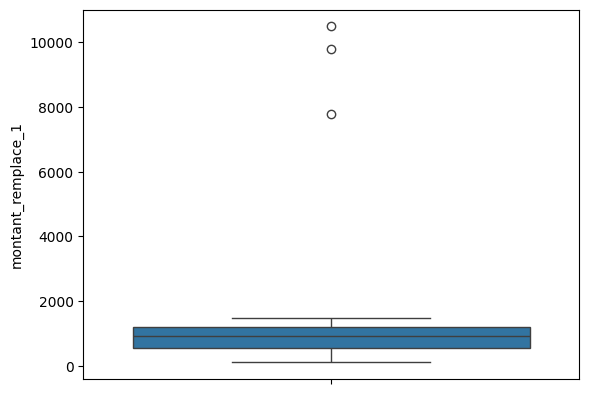

In [28]:
#On va verifier les valeurs aberrantes
#en utilisant la bibliotheque seaborn
import seaborn as sns
sns.boxplot(df1['montant_remplace_1'])


In [29]:
#il ya 3 valeurs manquantes en regardant le graphique
#qu'il faut remplacer par la methode de Z-score (calcul de la moyenne et de l'écart-type)

#calculer l'écart-type et la moyenne de montant_remplace_1
print(df1['montant_remplace_1'].std())
print(df1['montant_remplace_1'].mean())



1374.8138276824554
1052.94262295082


In [30]:
#on crée la variable Z-score
#on soustrait la moyenne au montant et on divise par l'écart-type
df1['Z_score'] = (df1['montant_remplace_1'] - df1['montant_remplace_1'].mean()) / df1['montant_remplace_1'].std()
df1.head()


,service,ville,Quantite,montant_remplace_1,taxe_remplace_1,Z_score
0,S2,Casablanca,1818,115.000000,11.500000,-6.822325e-01
1,S2,Dakar,1003,753.000000,75.300000,-2.181696e-01
2,S3,Bamako,1143,1014.000000,50.700000,-2.832574e-02
3,S2,Douala,1562,308.000000,15.400000,-5.418498e-01
4,S2,Casablanca,1521,1052.942623,125.039496,-1.653851e-16


In [31]:
#on va faire l'imputation par 1500 de la variable montant
df1.loc[df['montant_remplace_1']<=1500, 'montant_final'] = df1['montant_remplace_1']
df1.loc[df['montant_remplace_1']>1500, 'montant_final'] = 1500
df1.head(15)


,service,ville,Quantite,montant_remplace_1,taxe_remplace_1,Z_score,montant_final
0,S2,Casablanca,1818,115.000000,11.500000,-6.822325e-01,115.000000
1,S2,Dakar,1003,753.000000,75.300000,-2.181696e-01,753.000000
2,S3,Bamako,1143,1014.000000,50.700000,-2.832574e-02,1014.000000
3,S2,Douala,1562,308.000000,15.400000,-5.418498e-01,308.000000
4,S2,Casablanca,1521,1052.942623,125.039496,-1.653851e-16,1052.942623
5,S3,Casablanca,1673,1407.000000,125.039496,2.575311e-01,1407.000000
6,S1,Casablanca,1717,1344.000000,134.400000,2.117068e-01,1344.000000
7,S1,Dakar,1711,594.000000,59.400000,-3.338217e-01,594.000000
8,S3,Dakar,1900,536.000000,53.600000,-3.760092e-01,536.000000
9,S1,Casablanca,2068,958.000000,95.800000,-6.905853e-02,958.000000


<Axes: ylabel='taxe_remplace_1'>

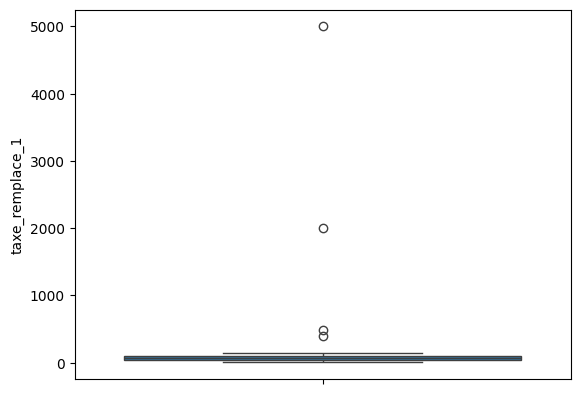

In [32]:
#on sort le boxplot de la variable taxe
sns.boxplot(df1['taxe_remplace_1'])


In [37]:
#imputation de la variable taxe
df1.loc[df['taxe_remplace_1']<=150, 'taxe_final'] = df1['taxe_remplace_1']
df1.loc[df['taxe_remplace_1']>150, 'taxe_final'] = 150
df1.head(15)

,service,ville,Quantite,montant_remplace_1,taxe_remplace_1,Z_score,montant_final,taxe_final
0,S2,Casablanca,1818,115.000000,11.500000,-6.822325e-01,115.000000,11.500000
1,S2,Dakar,1003,753.000000,75.300000,-2.181696e-01,753.000000,75.300000
2,S3,Bamako,1143,1014.000000,50.700000,-2.832574e-02,1014.000000,50.700000
3,S2,Douala,1562,308.000000,15.400000,-5.418498e-01,308.000000,15.400000
4,S2,Casablanca,1521,1052.942623,125.039496,-1.653851e-16,1052.942623,125.039496
5,S3,Casablanca,1673,1407.000000,125.039496,2.575311e-01,1407.000000,125.039496
6,S1,Casablanca,1717,1344.000000,134.400000,2.117068e-01,1344.000000,134.400000
7,S1,Dakar,1711,594.000000,59.400000,-3.338217e-01,594.000000,59.400000
8,S3,Dakar,1900,536.000000,53.600000,-3.760092e-01,536.000000,53.600000
9,S1,Casablanca,2068,958.000000,95.800000,-6.905853e-02,958.000000,95.800000


<Axes: ylabel='taxe_final'>

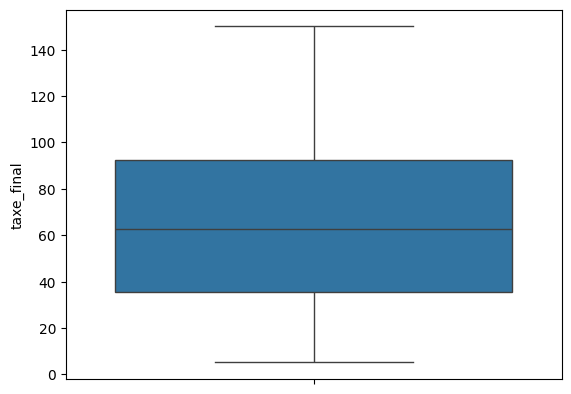

In [36]:
#verifier la taxe finale pour voir s'il n'ya plus de valeurs aberrantes
sns.boxplot(df1['taxe_final'])

In [39]:
#supprimer toutes les taxes superieures à 150
df_taxe_inf_150 = df1[df1['taxe_remplace_1']<=150]
df_taxe_inf_150.head(15)

,service,ville,Quantite,montant_remplace_1,taxe_remplace_1,Z_score,montant_final,taxe_final
0,S2,Casablanca,1818,115.000000,11.500000,-6.822325e-01,115.000000,11.500000
1,S2,Dakar,1003,753.000000,75.300000,-2.181696e-01,753.000000,75.300000
2,S3,Bamako,1143,1014.000000,50.700000,-2.832574e-02,1014.000000,50.700000
3,S2,Douala,1562,308.000000,15.400000,-5.418498e-01,308.000000,15.400000
4,S2,Casablanca,1521,1052.942623,125.039496,-1.653851e-16,1052.942623,125.039496
5,S3,Casablanca,1673,1407.000000,125.039496,2.575311e-01,1407.000000,125.039496
6,S1,Casablanca,1717,1344.000000,134.400000,2.117068e-01,1344.000000,134.400000
7,S1,Dakar,1711,594.000000,59.400000,-3.338217e-01,594.000000,59.400000
8,S3,Dakar,1900,536.000000,53.600000,-3.760092e-01,536.000000,53.600000
9,S1,Casablanca,2068,958.000000,95.800000,-6.905853e-02,958.000000,95.800000


<Axes: ylabel='taxe_remplace_1'>

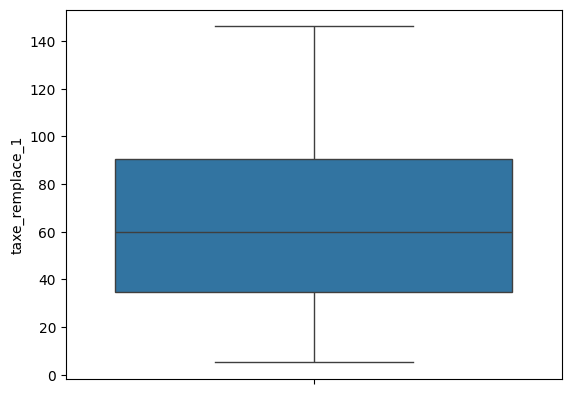

In [40]:
#verification de taxe remplace pour voir si les valeurs
#superieures à 150 ont été supprimées
sns.boxplot(df_taxe_inf_150['taxe_remplace_1'])